<a href="https://colab.research.google.com/github/badrinarayanan02/deep_learning/blob/main/2348507_DLLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Neural Network Model to Predict Customer Churn Rates**

Tasked with developing a deep neural network (DNN) model to predict customer churn for a telecommunications company. The dataset provided contains various features such as customer demographics, usage patterns, and service subscription details. Objective is to implement dropout, layer-wise dropout, and Monte Carlo dropout techniques in the DNN architecture to assess their impact on model performance and generalization.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow import keras
import tensorflow
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.layers import  Dense,Dropout

In [57]:
churnData = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churnData

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [58]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Inference:** There is no null values in the dataset

In [59]:
churnData.shape

(7043, 21)

# **Data Preprocessing**

In [60]:
churnData.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [62]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


Converting object datatype to numeric

In [61]:
cat_cols = churnData.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    churnData[col] = le.fit_transform(churnData[col])

Visualizing Churned Customers and Non Churned Customers

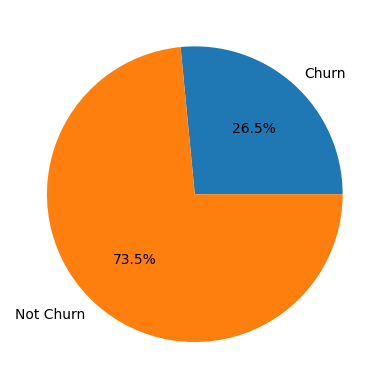

In [63]:
labels = 'Churn', 'Not Churn'
sizes = [churnData['Churn'].value_counts()[1], churnData['Churn'].value_counts()[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Distribution of Churn vs Not Churn before SMOTE

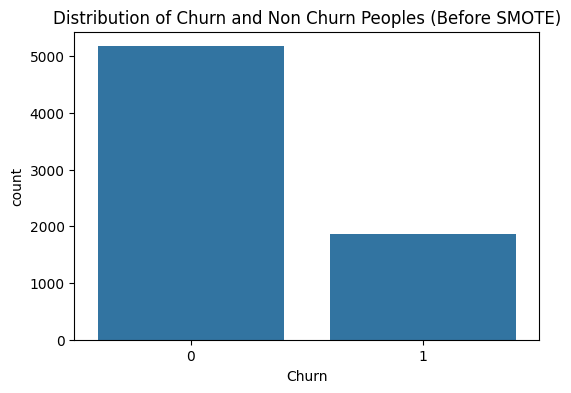

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=churnData)
plt.title('Distribution of Churn and Non Churn Peoples (Before SMOTE)')
plt.show()

**Inference**

Churned Customers: This group consists of customers who have canceled their subscription.

Non-Churned Customers: This group includes customers who have not canceled their subscription.

After analysing the proportion, we can conclude the dataset is imbalanced. People who cancelled the subscription is very less when compared to non churned customers.

Splitting features and target variable

In [74]:
x = churnData.drop('Churn',axis=1)
y = churnData['Churn']

Splitting the data

In [75]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Performing Smoting to solve the class imbalance issue - oversampling

In [76]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

Distribution of Churn vs Not Churn - After SMOTE

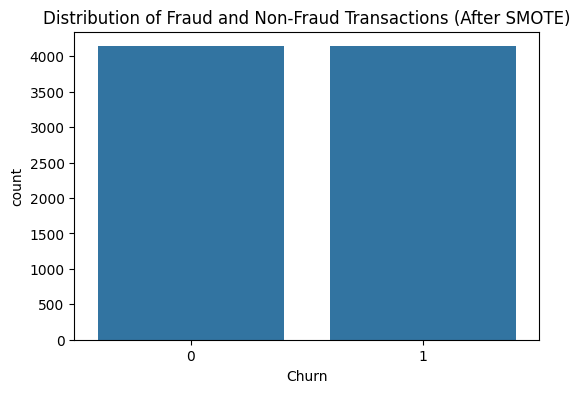

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_oversampled)
plt.title('Distribution of Fraud and Non-Fraud Transactions (After SMOTE)')
plt.show()

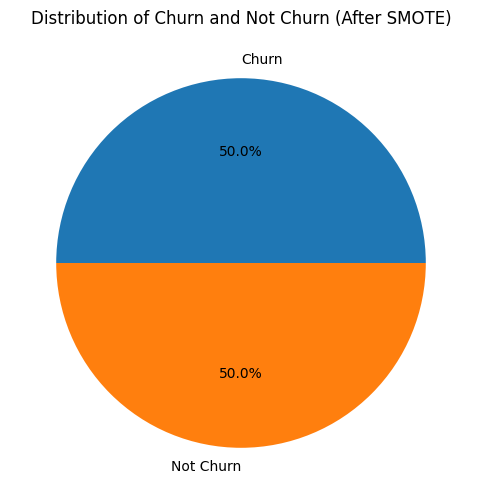

In [79]:
sizes_resampled = [sum(y_train_oversampled == 1), sum(y_train_oversampled == 0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes_resampled, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Churn and Not Churn (After SMOTE)')
plt.show()


**Inference**

Now the class imbalance issue is rectified, oversampling using SMOTE technique uses a synthetic data to provide equal distribution of both the classes.

# **DNN architecture**

Base Model without Dropout Technique

In [80]:
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train_oversampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
train = model.fit(X_train_oversampled, y_train_oversampled, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)

In [93]:
modelLossWithoutDropout, modelTestAccuracyWithoutDropout = model.evaluate(X_test, y_test)
print(f"Model Loss Without Dropout - Test Loss: {modelLossWithoutDropout:.4f}, Model Test Accuracy Without Dropout: {modelTestAccuracyWithoutDropout:.4f}")


45/45 [==============================] - 0s 9ms/step - loss: 2.1030 - accuracy: 0.5578
Model Loss Without Dropout - Test Loss: 2.1030, Model Test Accuracy Without Dropout: 0.5578


Implementing the **dropout** model

In [120]:
dropoutModel = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
dropoutModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

dmHistory = dropoutModel.fit(X_train_oversampled, y_train_oversampled, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)

dropout_test_loss, dropout_test_accuracy = dropoutModel.evaluate(X_test, y_test)
print(f"Dropout Model - Test Loss: {dropout_test_loss:.4f}, Test Accuracy: {dropout_test_accuracy:.4f}")


45/45 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.7353
Dropout Model - Test Loss: 0.6926, Test Accuracy: 0.7353


Implementing **Layer wise dropout** model

In [121]:
layerwiseDropoutModel = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


layerwiseDropoutModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ldmHistory = layerwiseDropoutModel.fit(X_train_oversampled, y_train_oversampled, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)

layerwise_test_loss, layerwise_test_accuracy = layerwiseDropoutModel.evaluate(X_test, y_test)
print(f"Layer-wise Dropout Model - Test Loss: {layerwise_test_loss:.4f}, Test Accuracy: {layerwise_test_accuracy:.4f}")


45/45 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.2647
Layer-wise Dropout Model - Test Loss: 0.6932, Test Accuracy: 0.2647


**Inference**

After implementing layer wise dropout model, we can observe that the test accuracy is decreasing.

Implementing **monte carlo dropout** model

In [124]:
mcDropoutModel = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mcDropoutModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mcdHistory = mcDropoutModel.fit(X_train_oversampled, y_train_oversampled, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0)

test_loss, test_accuracy = mcDropoutModel.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

45/45 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.7353
Test Loss: 0.6929, Test Accuracy: 0.7353


**Inference**

Test Loss is 0.6929 and Test Accuracy is 0.7353 for monte carlo dropout model. In conclusion, Monte Carlo dropout model is performing well.

# **Model Evaluation**

In [131]:
def evaluateModel(model, X_test, y_test, threshold=0.5):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return  f1, roc_auc

In [132]:
dropout_f1, dropout_roc_auc = evaluateModel(dropoutModel, X_test, y_test)
layerwise_dropout_f1, layerwise_dropout_roc_auc = evaluateModel(layerwiseDropoutModel, X_test, y_test)
mc_dropout_f1, mc_dropout_roc_auc = evaluateModel(mcDropoutModel, X_test, y_test)


45/45 [==============================] - 0s 2ms/step


In [134]:
print("\nDropout Model:")
print("F1 Score:", dropout_f1)
print("ROC AUC Score:", dropout_roc_auc)

print("\nLayer-wise Dropout Model:")
print("F1 Score:", layerwise_dropout_f1)
print("ROC AUC Score:", layerwise_dropout_roc_auc)

print("\nMonte Carlo Dropout Model:")
print("F1 Score:", mc_dropout_f1)
print("ROC AUC Score:", mc_dropout_roc_auc)


Dropout Model:
F1 Score: 0.0
ROC AUC Score: 0.49865951742627346

Layer-wise Dropout Model:
F1 Score: 0.4186307519640853
ROC AUC Score: 0.5

Monte Carlo Dropout Model:
F1 Score: 0.0
ROC AUC Score: 0.5


**Inference**

Thus the evalution metrics of each dropout model is obtained above.

Visualizing the training and validation accuracy/loss curves for each model

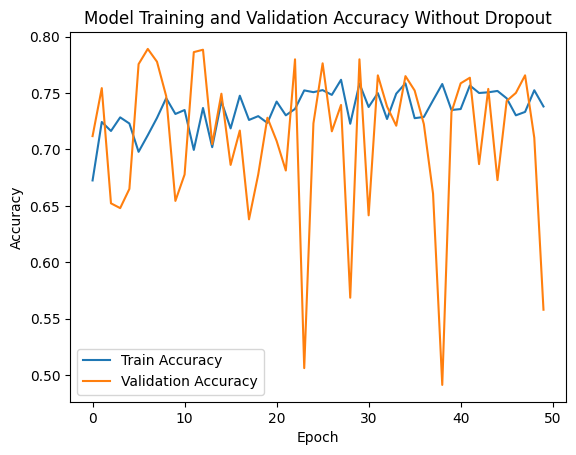

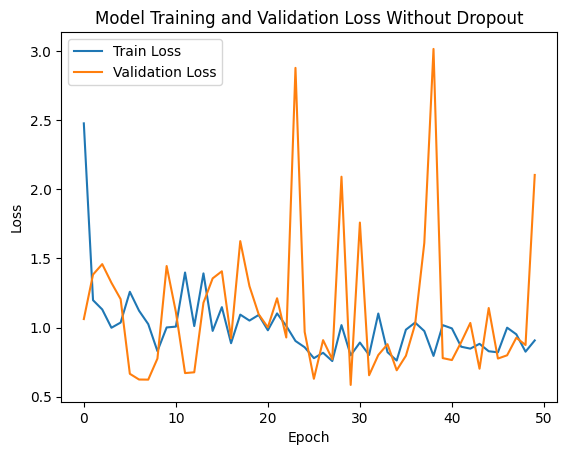

In [101]:
plt.plot(train.history['accuracy'], label='Train Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training and Validation Accuracy Without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train.history['loss'], label='Train Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss Without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


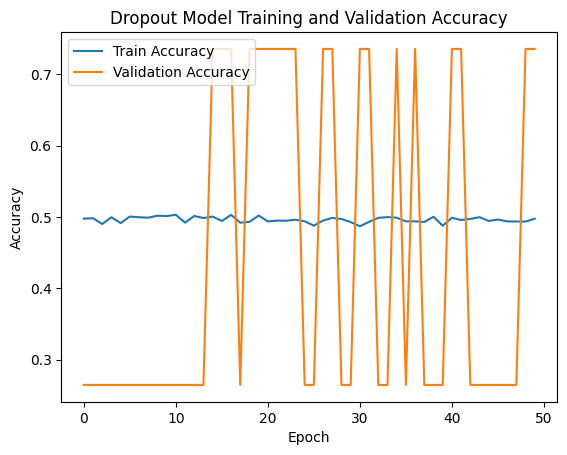

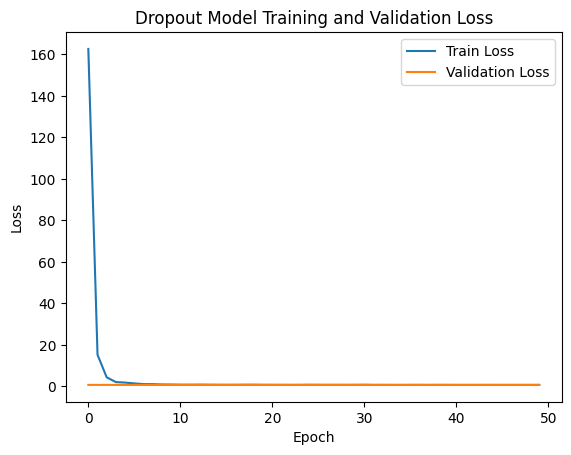

In [118]:
plt.plot(dmHistory.history['accuracy'], label='Train Accuracy')
plt.plot(dmHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dropout Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(dmHistory.history['loss'], label='Train Loss')
plt.plot(dmHistory.history['val_loss'], label='Validation Loss')
plt.title('Dropout Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

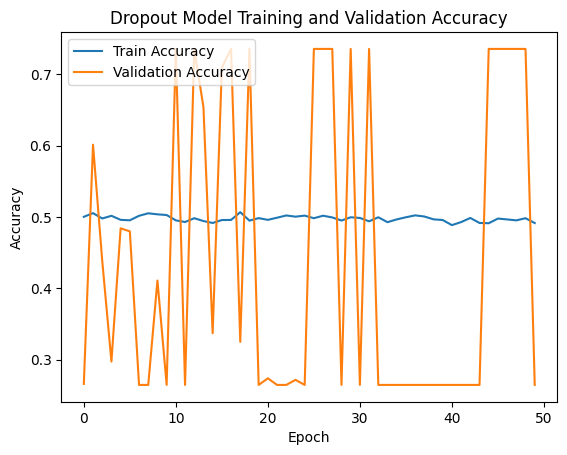

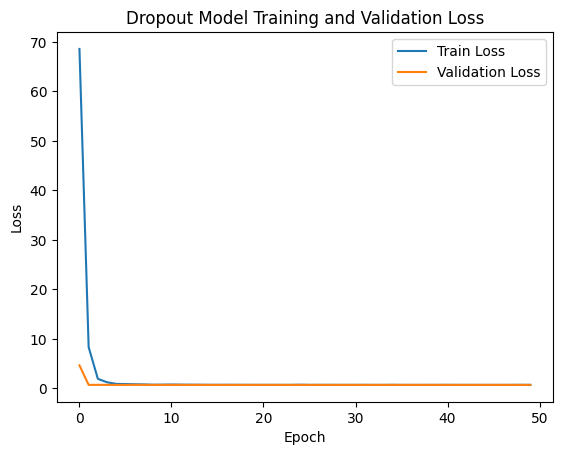

In [123]:
plt.plot(ldmHistory.history['accuracy'], label='Train Accuracy')
plt.plot(ldmHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('LayerWise Dropout Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(ldmHistory.history['loss'], label='Train Loss')
plt.plot(ldmHistory.history['val_loss'], label='Validation Loss')
plt.title('LayerWise Dropout Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

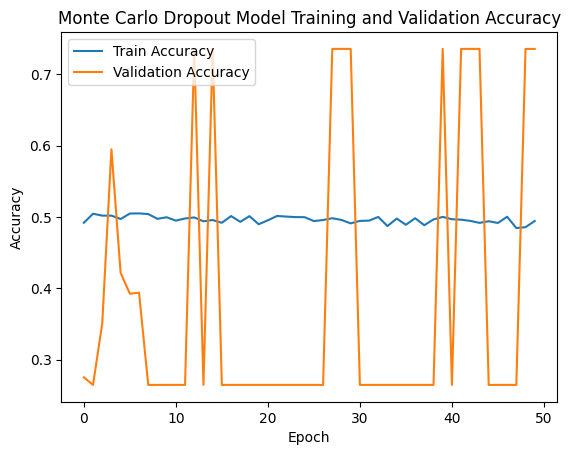

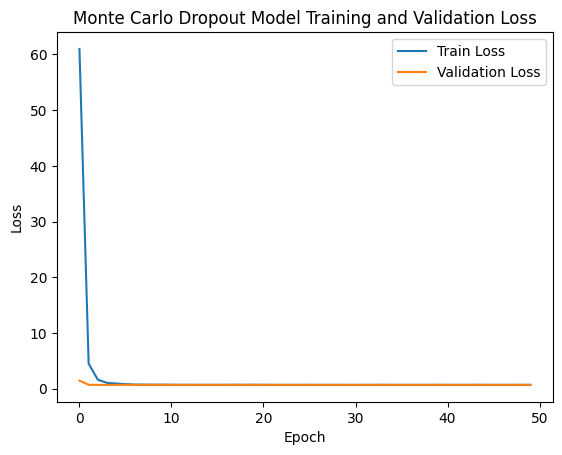

In [126]:
plt.plot(mcdHistory.history['accuracy'], label='Train Accuracy')
plt.plot(mcdHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Monte Carlo Dropout Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(mcdHistory.history['loss'], label='Train Loss')
plt.plot(mcdHistory.history['val_loss'], label='Validation Loss')
plt.title('Monte Carlo Dropout Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Conclusion**

Thus the task to create a deep neural network model to predict the customer churn rates has been implemented successfully. Initially the dataset was in a imbalanced state, performed SMOTE to resolve the issue. Implemented different dropout regularization techniques to avoid overfitting. Monte carlo dropout model performed well as far as the observationS anyway it gave a different result after each execution.